In [122]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import numpy as np

### Exercice 1

In [123]:
def f(x):
    return ((1 + x) - 1) / x

x1 = f(1e-5)

epsilon = np.finfo(float).eps

x2 = f(epsilon)

x3 = f(epsilon/2.0)

print(f"f(1e-5) = {x1}")
print(f"f(epsilon) = {x2}")
print(f"f(epsilon/2) = {x3}")


f(1e-5) = 1.0000000000065512
f(epsilon) = 1.0
f(epsilon/2) = 0.0


### Exercice 2

#### 1.

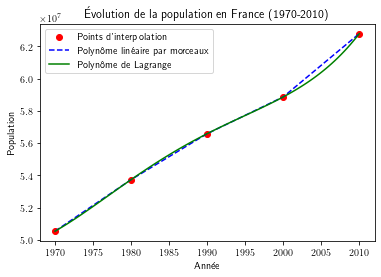

In [124]:
from scipy.interpolate import lagrange

annees = [1970, 1980, 1990, 2000, 2010]
population = [5.053e7, 5.373e7, 5.658e7, 5.886e7, 6.279e7]

plt.scatter(annees, population, color='red', label='Points d\'interpolation')

plt.plot(annees, population, color='blue', label='Polynôme linéaire par morceaux', linestyle='dashed')

poly_lagrange = lagrange(annees, population)
annees_range = np.linspace(1970, 2010, 100)
plt.plot(annees_range, poly_lagrange(annees_range), color='green', label='Polynôme de Lagrange')

plt.xlabel('Année')
plt.ylabel('Population')
plt.title('Évolution de la population en France (1970-2010)')
plt.legend()
plt.show()


#### 2.

In [125]:
X = np.array(annees)
A = np.vander(X, increasing=True)

coefficients = np.linalg.solve(A, population)

#### 3.

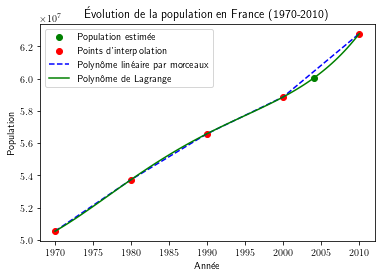

In [126]:
def interpolation_lagrange(annee, annees, populations):
    lagrange_polynomial = 0
    for i in range(len(populations)):
        term = populations[i]
        for j in range(len(annees)):
            if j != i:
                term = term * (annee - annees[j]) / (annees[i] - annees[j])
        lagrange_polynomial += term
    return lagrange_polynomial


def dichotomie(a, b, annee, populations, population_atteinte):
    while (b - a) >= 1:
        mid = (a + b) / 2
        if interpolation_lagrange(mid, annees, populations) - population_atteinte == 0:
            return mid
        elif interpolation_lagrange(mid, annees, populations) - population_atteinte > 0:
            b = mid
        else:
            a = mid
    return (a + b) / 2


population_atteinte = 6e7
annee_estimee = dichotomie(1970, 2010, annees, population, population_atteinte)
estimated_population = interpolation_lagrange(annee_estimee, annees, population)
plt.scatter(annee_estimee, estimated_population, color='green', label='Population estimée')

annees = [1970, 1980, 1990, 2000, 2010]
population = [5.053e7, 5.373e7, 5.658e7, 5.886e7, 6.279e7]

plt.scatter(annees, population, color='red', label='Points d\'interpolation')

plt.plot(annees, population, color='blue', label='Polynôme linéaire par morceaux', linestyle='dashed')

poly_lagrange = lagrange(annees, population)
annees_range = np.linspace(1970, 2010, 100)
plt.plot(annees_range, poly_lagrange(annees_range), color='green', label='Polynôme de Lagrange')

plt.xlabel('Année')
plt.ylabel('Population')
plt.title('Évolution de la population en France (1970-2010)')
plt.legend()
plt.show()

### Exercice 3

#### 1.

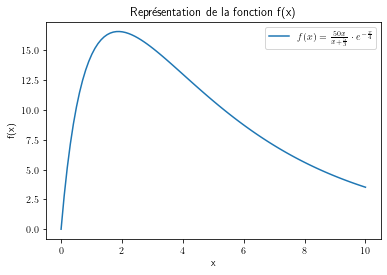

In [127]:
def f(x):
    return (50 * x / (x + 5/3)) * np.exp(-x/4)

x = np.linspace(0, 10, 100)
y = f(x)

plt.plot(x, y, label=r'$f(x) = \frac{50x}{x + \frac{5}{3}} \cdot e^{-\frac{x}{4}}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Représentation de la fonction f(x)')
plt.legend()
plt.show()

#### 2.

In [128]:
a = 0
b = 10

n = 20

h = (b - a) / n

somme = 0
for i in range(1, n+1):
    xi = a + i * h
    somme += f(xi)

# Calcul de la valeur approchée de l'intégrale
I = h * somme
print(f"La valeur approchée de l'intégrale I est {I}:")



La valeur approchée de l'intégrale I est 100.30669945230329:


#### 3.

### Exercice 4

#### 1.

In [129]:
def f(x, r, gamma):
    return 4 * r**3 * gamma - 3 * x**2 * r + x**3

def f_prime(x, r):
    return -6 * x * r + 3 * x**2

x0 = 0.05
precision = 10e-5
r = 0.055
gamma = 0.6

iterations = 0
while True:
    x1 = x0 - f(x0, r, gamma) / f_prime(x0, r)
    iterations += 1
    if abs(x1 - x0) < precision:
        break
    x0 = x1

print(f"La solution approchée est {x1}")
print(f"Nombre d'itérations {iterations}")


La solution approchée est 0.06237757654346585
Nombre d'itérations 2


#### 2.

In [130]:

a = 0  
b = 1 
n = 20 
h = (b - a) / n 

somme = 0
for i in range(1, n+1):
    xi = a + i * h 
    somme += f(xi, r, gamma)

approximation = h * somme
print(f"La valeur approchée de l'intégrale est {approximation}")

La valeur approchée de l'intégrale est 0.21683055000000004


#### 3.

In [131]:

a = 0
b = 1 
n = 20 
h = (b - a) / n  

somme = 0
for i in range(1, n):
    xi = a + i * h  
    somme += f(xi,r , gamma)

approximation = h * (0.5 * (f(a, r, gamma) + f(b, r, gamma)) + somme)
print("La valeur approchée de l'intégrale est :", approximation)




La valeur approchée de l'intégrale est : 0.19595555000000006
